# Homework 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import pandas as pd

## Problem 2

In [14]:
dataset = np.array([[1, -2, 4, -1, -1], 
           [1, 4, 1, -1, -1],
           [1, 1, 6, -1, 1],
           [1, 2, 4, -1, 1],
           [1, 6, 2, -1, 1]])

y = dataset[:,-1:]
A = dataset[:,:-1]
print(A)
print(y)

[[ 1 -2  4 -1]
 [ 1  4  1 -1]
 [ 1  1  6 -1]
 [ 1  2  4 -1]
 [ 1  6  2 -1]]
[[-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]


In [15]:
def initialize_weights(num_features):
    return np.random.rand(num_features, 1)

def perceptron_forward_pass(A, weights):
    return A @ weights

def perceptron_cost(y_preds, y): 
    return 1 / len(y) * np.sum((-y_preds * y))

def perceptron_gradient(cost, A, y):
    return -A.T * y

weights = initialize_weights(A.shape[1])
alpha = 0.1
costs = []
for i in range(50):
    cost = 0
    for _example, _target in zip(A, y):

        # Adds a dimention since we lose one
        example = _example[np.newaxis, :]
        target = _target[:, np.newaxis]

        prediction = perceptron_forward_pass(example, weights)
        error = perceptron_cost(prediction, target)

        if (error > 0):
            cost += error
            gradient = perceptron_gradient(error, example, target)
            weights -= alpha * gradient

    print(f"Iteration: {i}")
    print(f"Cost: {i}")
    print(f"Predictions:\n {perceptron_forward_pass(A, weights)}")
    print(f"Weights:\n {weights}\n")

    costs.append(cost)
    if (cost == 0):
        break


Iteration: 0
Cost: 0
Predictions:
 [[2.30407071]
 [0.39627111]
 [3.65666982]
 [2.35020369]
 [1.07833729]]
Weights:
 [[0.14017589]
 [0.01153324]
 [0.65899969]
 [0.44903745]]

Iteration: 1
Cost: 1
Predictions:
 [[1.70407071]
 [0.09627111]
 [2.85666982]
 [1.75020369]
 [0.67833729]]
Weights:
 [[0.04017589]
 [0.01153324]
 [0.55899969]
 [0.54903745]]

Iteration: 2
Cost: 2
Predictions:
 [[ 2.10407071]
 [-0.40372889]
 [ 3.15666982]
 [ 1.75020369]
 [ 0.07833729]]
Weights:
 [[-0.05982411]
 [-0.08846676]
 [ 0.65899969]
 [ 0.64903745]]

Iteration: 3
Cost: 3
Predictions:
 [[-0.09592929]
 [-0.20372889]
 [ 0.75666982]
 [ 0.35020369]
 [ 0.27833729]]
Weights:
 [[-0.15982411]
 [ 0.11153324]
 [ 0.25899969]
 [ 0.74903745]]

Iteration: 4
Cost: 4
Predictions:
 [[-0.09592929]
 [-0.20372889]
 [ 0.75666982]
 [ 0.35020369]
 [ 0.27833729]]
Weights:
 [[-0.15982411]
 [ 0.11153324]
 [ 0.25899969]
 [ 0.74903745]]



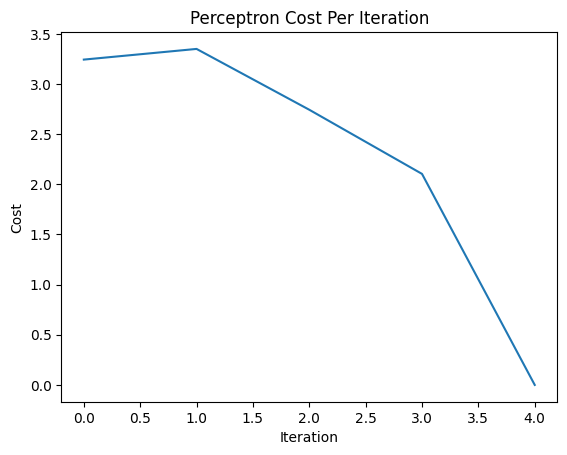

In [16]:
def plot_costs(costs):
    plt.plot(costs)
    plt.title("Perceptron Cost Per Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

plot_costs(costs)

In [17]:
def quantizer(predictions):
    quantized_preds = []
    for prediction in predictions: 
        if (prediction < 0):
            quantized_preds.append(-1)
        else:
            quantized_preds.append(1)
    return quantized_preds

predictions = perceptron_forward_pass(A, weights)
quant_preds = quantizer(predictions)

print("Accuracy:%.2f " %accuracy_score(y, quant_preds))

num_mis_classified = 0
for pred, target in zip(quant_preds, y):
    if pred != target:
        num_mis_classified += 1

print(f"Num misclassified: {num_mis_classified}")

Accuracy:1.00 
Num misclassified: 0


## Problem 4 & Problem 5

In [18]:
def get_data(csv_path):
    df = pd.read_csv(csv_path)
    x = df.iloc[:,0:3].values
    y = np.array(df['y'])
    y = y[:, np.newaxis]

    # Split the data into a train and test split
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=1/3) 

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Compact Notation
    ones_ = np.ones(len(Y_train), float)
    A_train = np.column_stack((ones_, X_train_std))

    ones_ = np.ones(len(Y_test))
    A_test = np.column_stack((ones_, X_test_std))
    return A_train, A_test, Y_train, Y_test

def mse_cost(Y_pred, Y):
    error = (Y_pred - Y) ** 2
    return np.sum(error) / len(Y)

def adaline_gradient(Y_pred, A, Y):
    return 2 / len(Y) * (A.T @ (Y_pred - Y))

## Dataset 1

Iteration: 0, Total Error: 1.7331610548081964
Iteration: 1, Total Error: 1.2249683841768937
Iteration: 2, Total Error: 0.9008139629741095
Iteration: 3, Total Error: 0.6940144939926491
Iteration: 4, Total Error: 0.5620610505826148
Iteration: 5, Total Error: 0.4778506411541736
Iteration: 6, Total Error: 0.4240998998463296
Iteration: 7, Total Error: 0.38978548205325003
Iteration: 8, Total Error: 0.3678754930345799
Iteration: 9, Total Error: 0.35388345849122343
Iteration: 10, Total Error: 0.3449464415915284
Iteration: 11, Total Error: 0.3392372174527847
Iteration: 12, Total Error: 0.33558939076003663
Iteration: 13, Total Error: 0.3332582759688172
Iteration: 14, Total Error: 0.3317683481219119
Iteration: 15, Total Error: 0.3308159058374667
Iteration: 16, Total Error: 0.3302069529739153
Iteration: 17, Total Error: 0.3298175493628415
Iteration: 18, Total Error: 0.329568498955316
Iteration: 19, Total Error: 0.32940918815993203
Iteration: 20, Total Error: 0.3293072648564703
Iteration: 21, Total

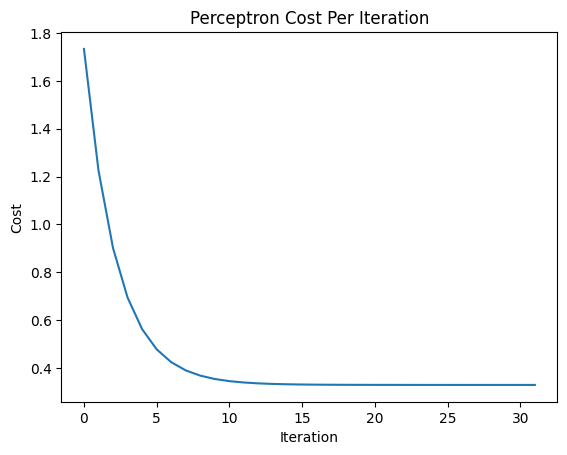

In [19]:
A_train, A_test, Y_train, Y_test = get_data("Dataset_1.csv")

t = 0
epochs = 100
tol = 1e-6
last_total_error = 100
total_error = 0
costs = []
alpha = 0.1
weights = initialize_weights(A_train.shape[1])

while (t < epochs and abs(last_total_error - total_error) > tol):
    last_total_error = total_error
    Y_pred = perceptron_forward_pass(A_train, weights)
    gradient = adaline_gradient(Y_pred, A_train, Y_train)
    weights -= alpha * gradient
    total_error = mse_cost(Y_pred, Y_train)
    costs.append(total_error)
    print(f"Iteration: {t}, Total Error: {total_error}")
    t += 1

plot_costs(costs)

In [20]:
train_preds = perceptron_forward_pass(A_train, weights)
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = perceptron_forward_pass(A_test, weights)
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.954954954954955, Train Misclassifications: 15
Test accuracy: 0.9640718562874252, Test Misclassification: 6


## See how Sk Learn Perceptron Performs

In [21]:
clf = Perceptron(tol=tol, random_state=0)
clf.fit(A_train[:,1:], Y_train)

train_preds = clf.predict(A_train[:,1:])
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = clf.predict(A_test[:,1:])
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.96996996996997, Train Misclassifications: 10
Test accuracy: 0.9820359281437125, Test Misclassification: 3


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dataset 2

Iteration: 0, Total Error: 2.699236716099819
Iteration: 1, Total Error: 1.820231776256704
Iteration: 2, Total Error: 1.2659187924198665
Iteration: 3, Total Error: 0.9161222899135855
Iteration: 4, Total Error: 0.6952313826706084
Iteration: 5, Total Error: 0.5556436335126281
Iteration: 6, Total Error: 0.4673704474871027
Iteration: 7, Total Error: 0.4115070848144022
Iteration: 8, Total Error: 0.376127995631366
Iteration: 9, Total Error: 0.35370509385502685
Iteration: 10, Total Error: 0.3394828993323281
Iteration: 11, Total Error: 0.33045524709141866
Iteration: 12, Total Error: 0.32472042531991085
Iteration: 13, Total Error: 0.32107452222850963
Iteration: 14, Total Error: 0.31875481438662323
Iteration: 15, Total Error: 0.3172777242624183
Iteration: 16, Total Error: 0.3163364233974267
Iteration: 17, Total Error: 0.31573608024445043
Iteration: 18, Total Error: 0.3153528834785702
Iteration: 19, Total Error: 0.3151080919149181
Iteration: 20, Total Error: 0.31495158836244697
Iteration: 21, Tota

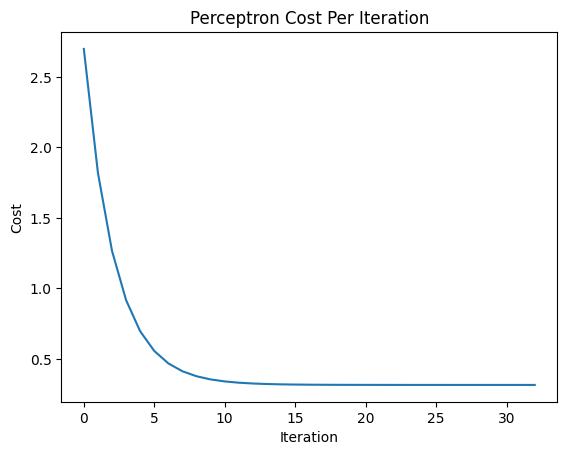

In [22]:
A_train, A_test, Y_train, Y_test = get_data("Dataset_2.csv")

t = 0
epochs = 100
tol = 1e-6
last_total_error = 100
total_error = 0
costs = []
alpha = 0.1
weights = initialize_weights(A_train.shape[1])

while (t < epochs and abs(last_total_error - total_error) > tol):
    last_total_error = total_error
    Y_pred = perceptron_forward_pass(A_train, weights)
    gradient = adaline_gradient(Y_pred, A_train, Y_train)
    weights -= alpha * gradient
    total_error = mse_cost(Y_pred, Y_train)
    costs.append(total_error)
    print(f"Iteration: {t}, Total Error: {total_error}")
    t += 1

plot_costs(costs)

In [23]:
train_preds = perceptron_forward_pass(A_train, weights)
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = perceptron_forward_pass(A_test, weights)
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.9459459459459459, Train Misclassifications: 18
Test accuracy: 0.9401197604790419, Test Misclassification: 10


In [24]:
clf = Perceptron(tol=tol, random_state=0)
clf.fit(A_train[:,1:], Y_train)

train_preds = clf.predict(A_train[:,1:])
quant_train_preds = quantizer(train_preds)
train_acc = accuracy_score(quant_train_preds, Y_train)
print(f"Train accuracy: {train_acc}, Train Misclassifications: {round((1 - train_acc) * len(Y_train))}")

test_preds = clf.predict(A_test[:,1:])
quant_test_preds = quantizer(test_preds)
test_acc = accuracy_score(quant_test_preds, Y_test)
print(f"Test accuracy: {test_acc}, Test Misclassification: {round((1 - test_acc) * len(Y_test))}")

Train accuracy: 0.960960960960961, Train Misclassifications: 13
Test accuracy: 0.9461077844311377, Test Misclassification: 9


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
